In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# load the data CSV file 
df=pd.read_csv('../matching/matched_data.csv', header=0, index_col=0)
test_df=pd.read_csv('../imputed_test_df.csv', header=0)

### drop out the columns that are not needed 
cols_to_drop=['cancer','X.1', 'X', 'eid','case_status', 'case_lymph', 'case_leuk',
            'C_reactive_protein.0.0', 'Traff_int_major_rd.0.0', 'housing_score','Age_recr.0.0', 'Sex.0.0', 'BMI.0.0',
            'Mood_swings.0.0', 'Smoking_status.0.0', 'Alc_drinker_status.0.0', 'health_score']
df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Scaling the blood counts
scaler = StandardScaler()
df_standardized=scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns = df.columns)
df_standardized.to_csv('../clustering/Standardized blood count.csv')
print(df_standardized.head())

   Lymphocyte_count.0.0  Monocyte_count.0.0  Reti_count.0.0  WBC_count.0.0  \
0              0.113554            0.001141        0.314987       0.212246   
1              1.416143           -0.100397       -0.514203       1.424125   
2             -0.084666           -0.100397        0.149149      -0.301262   
3              0.396725            0.102678        0.220222       1.095480   
4              1.359509            0.051910       -0.490512       1.105750   

   RBC_count.0.0  Hgb_conc.0.0  Haematocrit_perc.0.0  Platelet_count.0.0  \
0       0.859254     -0.150140             -0.034410           -0.540180   
1       0.337141     -0.655488             -0.236906           -0.443663   
2      -0.398564     -0.487039             -0.815468            0.698453   
3      -0.707086     -1.329285             -1.538670            0.891486   
4      -0.802015     -0.293322             -0.066231           -0.237760   

   Basophil_count.0.0  Eosinophil_count.0.0  Neutrophil_count.0.0  \
0    

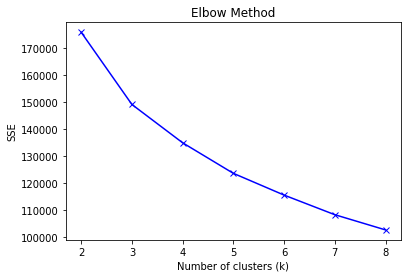

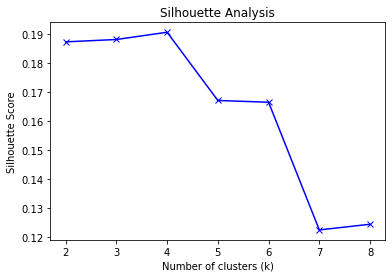

The optimal number of clusters is 4


C:\Users\jay_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jay_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


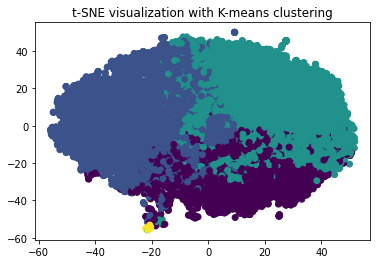

The silhouetter score with 2 clusters is 0.18723627922781663
The silhouetter score with 3 clusters is 0.18805029250855515
The silhouetter score with 4 clusters is 0.1905524011898147
The silhouetter score with 5 clusters is 0.16701945789760028
The silhouetter score with 6 clusters is 0.16641459107085196
The silhouetter score with 7 clusters is 0.12237294343858003
The silhouetter score with 8 clusters is 0.12432490167855732


In [3]:
## KMEANS
# Define a range of number of clusters to test
k_range = range(2, 9)

# Initialize empty lists to store the SSE and silhouette scores
sse = []
silhouette_scores = []

# Fit KMeans for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_standardized, kmeans.labels_))

# Plot the elbow curve
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_k}")

# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with K-means clustering")
plt.show()
for k in k_range:
    print(f'The silhouetter score with {k} clusters is {silhouette_scores[k-2]}')


In [13]:
for k in [3,5]:
    kmeans_train_df=df_standardized.copy()
    kmeans_test_df=test_df.copy()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    for df in [kmeans_train_df, kmeans_test_df]:
        labels = kmeans.predict(df)
        print(set(labels))
        df['cluster_kmeans'] = labels
        # Add three new columns for each cluster
        df['cluster_0'] = (df['cluster_kmeans'] == 0).astype(int)
        df['cluster_1'] = (df['cluster_kmeans'] == 1).astype(int)
        df['cluster_2'] = (df['cluster_kmeans'] == 2).astype(int)
        if df is kmeans_train_df:
            df.to_csv(f'Train {k}Kmeans.csv', index=False)  
        else:
            df.to_csv(f'Test {k}Kmeans.csv', index=False)  
    

{0, 1, 2}
{0, 1}
{0, 1, 2, 3, 4}
{0, 1, 2, 4}


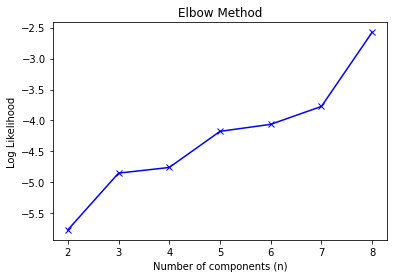

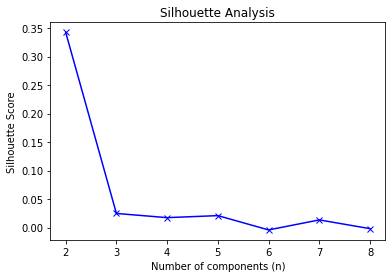

The optimal number of clusters is 2


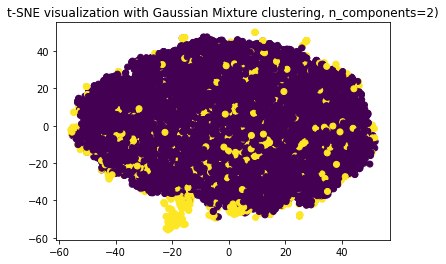

The silhouetter score with 2 components is 0.34252943547806664
The silhouetter score with 3 components is 0.02488525983234895
The silhouetter score with 4 components is 0.017554323126417467
The silhouetter score with 5 components is 0.021096602122408076
The silhouetter score with 6 components is -0.003968603507478541
The silhouetter score with 7 components is 0.013557904212219753
The silhouetter score with 8 components is -0.0017738681716494653


In [14]:
## GAUSSIAN MIXTURE
# Define a range of number of clusters to test
n_component_range = range(2, 9)

# Initialize empty lists to store the SSE and silhouette scores
log_lik = []
silhouette_scores = []

# Fit KMeans for each value of k
for n in n_component_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_standardized)
    log_lik.append(gmm.score(df_standardized))
    silhouette_scores.append(np.mean(silhouette_samples(df_standardized, gmm.predict(df_standardized)))
)

# Plot the elbow curve
plt.plot(n_component_range, log_lik, 'bx-')
plt.xlabel('Number of components (n)')
plt.ylabel('Log Likelihood')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.plot(n_component_range, silhouette_scores, 'bx-')
plt.xlabel('Number of components (n)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_n = n_component_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_n}")

# Cluster the transformed data using Gaussian Mixture
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
labels = gmm.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with Gaussian Mixture clustering, n_components={optimal_n})")
plt.show()
for n in n_component_range:
    print(f'The silhouetter score with {n} components is {silhouette_scores[n-2]}')


In [15]:
for n in [2,3,5]:
    gaus_train_df=df_standardized.copy()
    gaus_test_df=test_df.copy()
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_standardized)
    for df in [gaus_train_df, gaus_test_df]:
        labels = gmm.predict(df)
        print(set(labels))
        df['cluster_ncomponents'] = labels
        # Add three new columns for each cluster
        df['cluster_0'] = (df['cluster_ncomponents'] == 0).astype(int)
        df['cluster_1'] = (df['cluster_ncomponents'] == 1).astype(int)
        df['cluster_2'] = (df['cluster_ncomponents'] == 2).astype(int)
        if df is gaus_train_df:
            df.to_csv(f'Train {n}GMM.csv', index=False)  
        else:
            df.to_csv(f'Test {n}GMM.csv', index=False)  

{0, 1}
{0, 1}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2, 3, 4}
{0, 1, 2, 4}


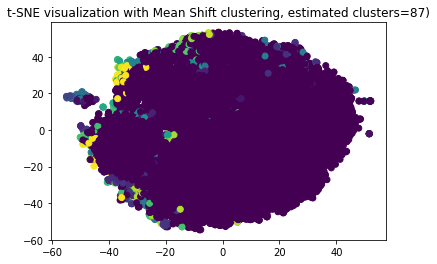

In [6]:
### MEAN SHIFT

# Estimate the bandwidth parameter for Mean Shift
bandwidth = estimate_bandwidth(df_standardized, quantile=0.2, n_samples=500)

# Cluster the transformed data using Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = ms.fit_predict(df_standardized)
n_clusters_ = len(np.unique(labels))

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with Mean Shift clustering, estimated clusters={n_clusters_})")
plt.show() # MEAN SHIFT PRODUCES BAD CLUSTERS WHATEVER BANDWIDTH IS CHOSEN
